# Inspecting Output

In [23]:
import pickle

## SFS

In [24]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/data/bottleneck_SFS.pkl', 'rb') as f:
    sfs = pickle.load(f)

In [25]:
sfs

Spectrum([-- 422.0 223.0 224.0 176.0 102.0 108.0 75.0 84.0 44.0 43.0 38.0 63.0 48.0
 42.0 18.0 33.0 33.0 21.0 37.0 --], folded=False, pop_ids=['N0'])

## Moments output

In [28]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/inferences/moments/bottleneck_fit_params.pkl', 'rb') as f:
    fit_params = pickle.load(f)

In [29]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/data/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [30]:
sampled_params

{'N0': 10000.0,
 'N_bottleneck': 2000.0,
 'N_recover': 5000.0,
 't_bottleneck_start': 300,
 't_bottleneck_end': 100}

In [31]:
fit_params

[{'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4814.863413334766,
  't_bottleneck_start': 282.53943228109597,
  't_bottleneck_end': 101.81965245016352,
  'loglik': 91.70641751371394},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4580.456382344627,
  't_bottleneck_start': 295.1713205319667,
  't_bottleneck_end': 100.03988696241754,
  'loglik': 91.70641751371394},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 5020.75243450225,
  't_bottleneck_start': 269.4637266675492,
  't_bottleneck_end': 103.97308060939703,
  'loglik': 91.70641751371394}]

## Dadi Output

In [33]:
with open('/sietch_colab/akapoor/Infer_Demography/bottleneck/inferences/dadi/bottleneck_fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [34]:
dadi_fit_params

[{'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4814.863413334769,
  't_bottleneck_start': 282.5394322810959,
  't_bottleneck_end': 101.81965245016355,
  'loglik': 9921.520456658549},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4874.666665077564,
  't_bottleneck_start': 288.33268504746843,
  't_bottleneck_end': 102.40508102020912,
  'loglik': 9921.520456658549},
 {'N0': 10000.0,
  'N_bottleneck': 2000.0,
  'N_recover': 4780.135965747534,
  't_bottleneck_start': 311.7612838315182,
  't_bottleneck_end': 113.75445442887344,
  'loglik': 9921.520456658549}]

## Stdpopsim Integration

In [7]:
import stdpopsim
species = stdpopsim.get_species("DroMel")
model = species.get_demographic_model("OutOfAfrica_2L06")

In [36]:
print(model.model.events[2].initial_size) # Ancestral population size
print(model.model.populations[0].initial_size) # Post expansion African population size
print(model.model.events[0].initial_size) # European bottleneck pop size
print(model.model.populations[1].initial_size) # Modern European population size
print(model.model.events[2].time) # Expansion of population in Africa
print(model.model.events[1].time) # African-European Divergence
print(model.model.events[0].time) # European population expansion|




1720600.0
8603000.0
2200
1075000.0
600000
158000
154600


In [29]:
model.model.events

[PopulationParametersChange(time=154600, initial_size=2200, growth_rate=None, population=1),
 MassMigration(time=158000, source=1, dest=0, proportion=1.0),
 PopulationParametersChange(time=600000, initial_size=1720600.0, growth_rate=None, population=0)]

In [3]:
model.model.populations[0].initial_size = 10

In [4]:
print(model.model.populations[0])


Population(initial_size=10, growth_rate=0, name='Mallard', description='Wild North American mallards', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0)


In [20]:
model.model.migration_matrix

array([[0.00000000e+00, 1.72048784e-06, 0.00000000e+00],
       [1.72048784e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [37]:
a = model.model.to_demes()

In [38]:
a

Graph(description='', time_units='generations', generation_time=1, doi=[], metadata={}, demes=[Deme(name='AFR', description='African D. melanogaster population', start_time=inf, ancestors=[], proportions=[], epochs=[Epoch(start_time=inf, end_time=600000, start_size=1720600.0, end_size=1720600.0, size_function='constant', selfing_rate=0, cloning_rate=0), Epoch(start_time=600000, end_time=0, start_size=8603000.0, end_size=8603000.0, size_function='constant', selfing_rate=0, cloning_rate=0)]), Deme(name='EUR', description='European D. melanogaster population', start_time=158000, ancestors=['AFR'], proportions=[1.0], epochs=[Epoch(start_time=158000, end_time=154600, start_size=2200, end_size=2200, size_function='constant', selfing_rate=0, cloning_rate=0), Epoch(start_time=154600, end_time=0, start_size=1075000.0, end_size=1075000.0, size_function='constant', selfing_rate=0, cloning_rate=0)])], migrations=[], pulses=[])

In [ ]:
model.populations

[Population(initial_size=10000, growth_rate=0.0, name='YRI', description='1000 Genomes YRI (Yoruba)', extra_metadata={'id': 'YRI', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=0),
 Population(initial_size=10000, growth_rate=0.0, name='CEU', description='1000 Genomes CEU (Utah Residents (CEPH) with Northern and Western European Ancestry)', extra_metadata={'id': 'CEU', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=1),
 Population(initial_size=10000, growth_rate=0.0, name='NEA', description='Neandertals', extra_metadata={'id': 'NEA', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=2)]

In [31]:
model.model.items

<bound method Mapping.items of Demography(populations=[Population(initial_size=10000, growth_rate=0.0, name='YRI', description='1000 Genomes YRI (Yoruba)', extra_metadata={'id': 'YRI', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=0), Population(initial_size=10000, growth_rate=0.0, name='CEU', description='1000 Genomes CEU (Utah Residents (CEPH) with Northern and Western European Ancestry)', extra_metadata={'id': 'CEU', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=1), Population(initial_size=10000, growth_rate=0.0, name='NEA', description='Neandertals', extra_metadata={'id': 'NEA', 'sampling_time': 0}, default_sampling_time=0, initially_active=None, id=2)], events=[MigrationRateChange(time=855, rate=0, source=-1, dest=-1), MigrationRateChange(time=856, rate=3.0237561476818266e-07, source=1, dest=2), MigrationRateChange(time=857, rate=3.0941225088385424e-07, source=1, dest=2), MigrationRateChange(time=858, rate=3.165909078218426e-07, 

In [5]:
import stdpopsim, msprime          # only two deps

def customise_ooa_extended_pulse(**kwargs) -> msprime.Demography:
    """
    Return an **msprime.Demography** object identical to
    `OutOfAfricaExtendedNeandertalAdmixturePulse_3I21`, except that any keyword
    you pass here replaces the model’s default value.

    Valid keywords  (all optional) ────────────────────────────────────────────
        NYRI, NCEU, NNEA            – population sizes
        T_OOA, T_NEASPLIT           – split times  (generations, *not* kya)
        T_PULSE_START, T_PULSE_END  – pulse window (generations)
        M_NEApCEU                   – per-generation NEA→CEU migration rate
    """
    # 1) grab the original
    species = stdpopsim.get_species("HomSap")
    dem = species.get_demographic_model(
            "OutOfAfricaExtendedNeandertalAdmixturePulse_3I21").model.copy()

    # 2) sizes -------------------------------------------------------------
    size_map = {"YRI": "NYRI", "CEU": "NCEU", "NEA": "NNEA"}
    for pop in dem.populations:
        if size_map[pop.name] in kwargs:
            pop.initial_size = kwargs[size_map[pop.name]]

    # 3) split times -------------------------------------------------------
    for ev in dem.events:                     # works in any msprime ≥1.0
        # CEU & YRI split (OOA)
        if isinstance(ev, msprime.MassMigration) and ev.source == 1 and ev.dest == 0:
            if "T_OOA" in kwargs:
                ev.time = kwargs["T_OOA"]
        # NEA–human split
        if isinstance(ev, msprime.MassMigration) and ev.source == 2 and ev.dest == 0:
            if "T_NEASPLIT" in kwargs:
                ev.time = kwargs["T_NEASPLIT"]

    # 4) overwrite pulse: drop old events, add ours ------------------------
    pulse_keys = {"T_PULSE_START", "T_PULSE_END", "M_NEApCEU"}
    if pulse_keys & kwargs.keys():
        dem.migration_rate_changes = [  # keep only non-NEA→CEU records
            m for m in dem.migration_rate_changes
            if not (m.source == "NEA" and m.dest == "CEU")
        ]
        # add fresh ones
        start = kwargs.get("T_PULSE_START", 1700)   # defaults = original
        end   = kwargs.get("T_PULSE_END",   900)
        rate  = kwargs.get("M_NEApCEU",     0.03)
        dem.migration_rate_changes.extend([
            msprime.MigrationRateChange(time=start, rate=rate,
                                        source="NEA", dest="CEU"),
            msprime.MigrationRateChange(time=end,   rate=0.0,
                                        source="NEA", dest="CEU"),
        ])

    return dem              # ready for msprime.sim_ancestry / .to_demes()

# ── example ─────────────────────────────────────────────────────────────
custom_demog = customise_ooa_extended_pulse(
    NYRI=8000, NCEU=12000, T_OOA=2500,
    T_PULSE_START=1800, T_PULSE_END=1000, M_NEApCEU=0.02
)

AttributeError: 'Demography' object has no attribute 'migration_rate_changes'

In [7]:
import stdpopsim, msprime

species = stdpopsim.get_species("HomSap")
cat_model = species.get_demographic_model(
    "OutOfAfricaExtendedNeandertalAdmixturePulse_3I21")

# In >= v0.3 the `model` attribute *is* an msprime.Demography
demo = cat_model.model.copy()      # make our own editable copy


In [8]:
# Double the present-day CEU size
demo["CEU"].initial_size *= 2

# Cut YRI↔CEU symmetric migration in half
new_matrix = demo.migration_matrix * 0.5
demo.set_migration_matrix(new_matrix)

# Remove the Neandertal→CEU pulse completely
demo.events = [e for e in demo.events
               if not (isinstance(e, msprime.MassMigration)
                       and e.dest == demo["CEU"].id)]


AttributeError: 'Demography' object has no attribute 'set_migration_matrix'

In [3]:
import pickle 
with open('/sietch_colab/akapoor/Infer_Demography/split_isolation/runs/run_0001/data/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [4]:
sampled_params

{'N0': 16609,
 'N1': 4950,
 'N2': 8727,
 'm': 6.97398292256458e-05,
 't_split': 4673}

In [1]:
import pickle
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_isolation/inferences/sim_0/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [2]:
dadi_fit_params

{'best_params': [array([2.18331227e+03, 2.95178502e+04, 2.18282507e+04, 3.23288191e-05,
         2.00000000e+04]),
  array([2.18331227e+03, 2.96051878e+04, 2.17271273e+04, 3.24199928e-05,
         2.00000000e+04])],
 'best_lls': [-576.9923217184846, -577.0031443763118]}

In [3]:
import pickle
with open('/projects/kernlab/akapoor/Infer_Demography/experiments/bottleneck/inferences/sim_0/all_inferences.pkl', 'rb') as f:
    all_inferences = pickle.load(f)

In [4]:
all_inferences

{'moments': {'best_params': ['N0'], 'best_lls': [94.73367150869032]},
 'dadi': {'best_params': ['N0'], 'best_lls': [-93.64312380114049]},
 'momentsLD': {'opt_params': {'N_bottleneck': 866.1572336041122,
   'N_recover': 9078.351185941146,
   't_bottleneck_start': 1554.509181997806,
   't_bottleneck_end': 849.999013978426,
   'N0': 9078.351185941146},
  'loglik': 2.699875797913049}}

In [11]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/inferences/sim_1/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [12]:
dadi_fit_params

{'best_params': [{'N0': 8139.331591383296,
   'N_bottleneck': 958.8227460999914,
   'N_recover': 19999.99999999998,
   't_bottleneck_start': 1700.9999999999998,
   't_bottleneck_end': 258.7649152312198}],
 'best_lls': [113.29296357567316]}

In [16]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/inferences/sim_0/all_inferences.pkl', 'rb') as f:
    all_inferences = pickle.load(f)

In [17]:
all_inferences

{'moments': {'best_params': [{'N0': 17555.922337392178,
    'N1': 7796.562630626548,
    'N2': 12188.245160817358,
    'm': 4.018009136894766e-05,
    't_split': 18341.851191110814},
   {'N0': 17555.922337392178,
    'N1': 7796.708576402069,
    'N2': 12188.846928503957,
    'm': 4.0178371412684415e-05,
    't_split': 18334.402769613047}],
  'best_lls': [1243.4709811391656, 1243.470970482198]},
 'dadi': {'best_params': [{'N0': 17555.922337392178,
    'N1': 7117.711335063998,
    'N2': 11075.137977795626,
    'm': 4.1700761922239436e-05,
    't_split': 9757.10177708768},
   {'N0': 17555.922337392178,
    'N1': 6561.476467594923,
    'N2': 10659.345933590477,
    'm': 4.9848274037219946e-05,
    't_split': 10979.275976153536}],
  'best_lls': [-1260.0160623676284, -1266.7306647855562]},
 'momentsLD': {'opt_params': {'N1': 9242.37313771942,
   'N2': 15812.570081954216,
   't_split': 119530.21366212315,
   'N0': 2.7379734966532323e-05},
  'loglik': 795.6257660955346}}

In [18]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/inferences/sim_0/MomentsLD/best_fit.pkl', 'rb') as f:
    moments_ld_fit_params = pickle.load(f)

In [19]:
moments_ld_fit_params

{'opt_params': {'N1': 9242.37313771942,
  'N2': 15812.570081954216,
  't_split': 119530.21366212315,
  'N0': 2.7379734966532323e-05},
 'loglik': 795.6257660955346}

In [20]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/features_df.pkl', 'rb') as f:
    features_df = pickle.load(f)

In [21]:
features_df

,dadi_N0,dadi_N1,dadi_N2,dadi_m,dadi_t_split,momentsLD_N0,momentsLD_N1,momentsLD_N2,momentsLD_t_split,moments_N0,moments_N1,moments_N2,moments_m,moments_t_split
0,27051.562034,9949.378242,28082.614239,1.000000e-04,20000.000000,0.000105,7994.337919,21422.108537,16877.797163,27051.562034,9352.126623,26864.245537,1.000000e-04,8927.871648
1,5305.061322,27749.605542,23754.806228,9.582252e-05,15789.871745,0.000092,24449.426021,23377.603484,13527.806240,5305.061322,25111.606610,21847.223620,1.000000e-04,13472.235464
2,892.646884,4144.794726,9465.692506,6.043604e-05,11920.055913,0.000030,3903.313494,11639.600790,16024.431945,892.646884,5205.814538,11866.869716,4.580140e-05,15482.503953
3,19694.516099,259.300264,27107.609489,7.448504e-06,10156.868476,0.000013,4190.264888,132138.975842,3981.106398,19694.516099,356.684642,30000.000000,7.045962e-07,6099.281912
4,1989.369097,12427.192636,19420.645371,1.000000e-08,2610.777694,0.000012,9149.690887,12481.147767,2040.356183,1989.369097,11772.023104,13416.484058,1.000000e-08,2264.584641
5,16354.776312,15772.093800,1981.981428,3.787637e-05,11220.777624,0.000019,17309.154642,2995.717584,13055.435774,16354.776312,20534.549276,2683.934423,1.754561e-05,9097.942884
6,20724.657112,8198.207681,15468.624606,7.375815e-05,9156.043594,0.000055,9343.365977,14421.681336,12115.132336,20724.657112,8160.467559,15457.205180,7.391561e-05,10565.725350
7,11046.918419,14301.561548,29230.637862,6.876497e-05,3896.273793,0.000172,8901.590328,18864.619718,6730.682371,11046.918419,14391.228542,30000.000000,4.595811e-05,3160.414693
8,8132.128583,21576.121740,20225.301189,1.000000e-04,13298.096884,0.000088,21661.696096,16506.883109,11471.758462,8132.128583,20406.116771,19115.703933,1.000000e-04,10946.701708
9,20598.423214,11106.480829,9888.703281,1.428229e-05,9747.122359,0.000022,11795.976739,10657.338593,14990.303983,20598.423214,11393.364741,10154.342320,1.406746e-05,10127.558813


In [22]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/targets_df.pkl', 'rb') as f:
    targets_df = pickle.load(f)

In [23]:
targets_df

,N0,N1,N2,m,t_split
0,27051.562034,7838.403122,22136.756040,0.000084,15727.693879
1,5305.061322,24058.315363,22966.330333,0.000076,13371.913601
2,892.646884,3897.212683,12243.226270,0.000028,15907.489103
3,19694.516099,308.414489,29639.305714,0.000012,11436.148031
4,1989.369097,9329.663905,14293.115351,0.000009,2123.304935
5,16354.776312,17026.067954,3003.480890,0.000018,13052.371370
6,20724.657112,8608.476479,15386.152568,0.000048,9019.781476
7,11046.918419,11344.860805,29819.918632,0.000057,3825.123643
8,8132.128583,19417.398262,16510.087674,0.000084,11050.358315
9,20598.423214,11909.330914,11143.304415,0.000020,14952.875347


In [24]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/inferences/sim_3/MomentsLD/best_fit.pkl', 'rb') as f:
    moments_ld_fit_params = pickle.load(f)

In [25]:
moments_ld_fit_params

{'best_params': {'N1': 2713.565306385988,
  'N2': 30625.431154930124,
  't_split': 196770.88000685372,
  'N0': 1.916556906860545e-05},
 'best_lls': 115.64566252077942}

In [1]:
import pickle
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/inferences/sim_0/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [2]:
dadi_fit_params

{'best_params': [{'N0': 6060.303776052738,
   'N_bottleneck': 681.0573336946379,
   'N_recover': 18622.343331919557,
   't_bottleneck_start': 2249.3304304384606,
   't_bottleneck_end': 926.7103582957724},
  {'N0': 6060.303776052738,
   'N_bottleneck': 681.0573336946379,
   'N_recover': 18621.626069275848,
   't_bottleneck_start': 2249.3647848809032,
   't_bottleneck_end': 926.6644232814249}],
 'best_lls': [-160.7920262536436, -160.79202662729494]}

In [3]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/inferences/sim_0/all_inferences.pkl', 'rb') as f:
    all_inferences = pickle.load(f)

In [4]:
all_inferences

{'moments': {'best_params': [{'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 14686.018006626999,
    't_bottleneck_start': 2384.90104967301,
    't_bottleneck_end': 729.8667838286508},
   {'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 14686.02132410507,
    't_bottleneck_start': 2384.90113533676,
    't_bottleneck_end': 729.8667889233898}],
  'best_lls': [166.02082074880946, 166.02081969192204]},
 'dadi': {'best_params': [{'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 18622.343331919557,
    't_bottleneck_start': 2249.3304304384606,
    't_bottleneck_end': 926.7103582957724},
   {'N0': 6060.303776052738,
    'N_bottleneck': 681.0573336946379,
    'N_recover': 18621.626069275848,
    't_bottleneck_start': 2249.3647848809032,
    't_bottleneck_end': 926.6644232814249}],
  'best_lls': [-160.7920262536436, -160.79202662729494]},
 'momentsLD': {'best_params': {'N_bottleneck': 681.05733369

In [5]:
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_migration/modeling/features_df.pkl', 'rb') as f:
    features_df = pickle.load(f)

In [6]:
features_df.columns

Index(['dadi_N0_rep_0', 'dadi_N1_rep_0', 'dadi_N2_rep_0', 'dadi_m12_rep_0',
       'dadi_m21_rep_0', 'dadi_t_split_rep_0', 'momentsLD_N0', 'momentsLD_N1',
       'momentsLD_N2', 'momentsLD_m12', 'momentsLD_m21', 'momentsLD_t_split',
       'moments_N0_rep_0', 'moments_N1_rep_0', 'moments_N2_rep_0',
       'moments_m12_rep_0', 'moments_m21_rep_0', 'moments_t_split_rep_0'],
      dtype='object')

In [7]:
features_df

,dadi_N0_rep_0,dadi_N1_rep_0,dadi_N2_rep_0,dadi_m12_rep_0,dadi_m21_rep_0,dadi_t_split_rep_0,momentsLD_N0,momentsLD_N1,momentsLD_N2,momentsLD_m12,momentsLD_m21,momentsLD_t_split,moments_N0_rep_0,moments_N1_rep_0,moments_N2_rep_0,moments_m12_rep_0,moments_m21_rep_0,moments_t_split_rep_0
0,16082.498766,15963.250412,17901.403598,0.000045,0.000048,3991.010112,2.434486e+04,2.432709e+04,2.442305e+04,1.985560e-12,6.693803e-05,4.992134e+03,17753.998124,15412.902597,20396.462638,0.000059,1.000000e-04,9032.902059
1,15585.349329,1407.931730,15471.998076,0.000042,0.000036,10136.448244,2.999049e+04,9.490894e+03,1.111980e+04,0.000000e+00,6.998668e-05,4.577467e+04,16638.666049,3197.512862,21093.579885,0.000031,1.000000e-08,11649.095047
2,15489.627724,18316.250883,584.850800,0.000047,0.000051,11057.696395,1.306038e+161,7.826075e+184,1.587973e+149,0.000000e+00,0.000000e+00,6.703269e+149,5630.152853,25483.744215,1002.389337,0.000012,5.000403e-05,16685.583465
3,19025.175918,4809.546815,8334.445504,0.000037,0.000089,12328.162642,9.807083e+03,4.896605e+03,9.945167e+03,1.088597e-04,1.357081e-05,6.024716e+03,27168.240967,5356.504586,10108.504807,0.000024,7.947507e-05,8410.380465
4,14436.099177,15888.209535,814.233665,0.000046,0.000051,10840.562986,6.055581e+03,1.808949e+04,1.766665e+03,3.698245e-05,9.398886e-09,2.072104e+05,16883.291132,15274.205747,793.989526,0.000050,5.567120e-05,20000.000000
5,8566.926103,7178.517832,22880.701732,0.000064,0.000059,14367.829164,2.615202e+04,1.856022e+04,2.449799e+04,7.386080e-116,1.091604e-04,2.638781e+06,8394.062781,7165.451567,22639.197063,0.000064,6.021152e-05,15183.711437
6,3760.139040,8401.399502,20739.540090,0.000054,0.000029,11107.205919,1.658502e+04,1.741497e+04,1.681184e+04,2.305927e-05,8.437017e-05,3.987593e+04,3183.790971,8152.152206,16731.299232,0.000078,1.372347e-05,9539.252320
7,16603.923119,17230.188210,15764.375667,0.000078,0.000071,1107.309203,1.006946e+04,1.010693e+04,1.002690e+04,9.485597e-04,1.009502e-04,2.068264e+03,11923.516694,28688.171766,16442.247222,0.000046,1.000000e-04,1163.798088
8,13137.655566,15825.550120,17527.592845,0.000059,0.000036,12616.309097,1.959806e+04,1.958889e+04,2.009946e+04,4.025654e-05,5.423711e-05,1.620766e+04,15145.374103,17624.901810,20512.541460,0.000048,3.346427e-05,13972.980570
9,6459.430004,18722.344791,22966.920719,0.000065,0.000049,1132.966378,1.116478e+04,1.934806e+04,9.096435e+03,4.300565e-10,4.072380e-04,2.180728e+03,8710.664289,24580.577430,30000.000000,0.000100,3.660772e-08,1518.210604


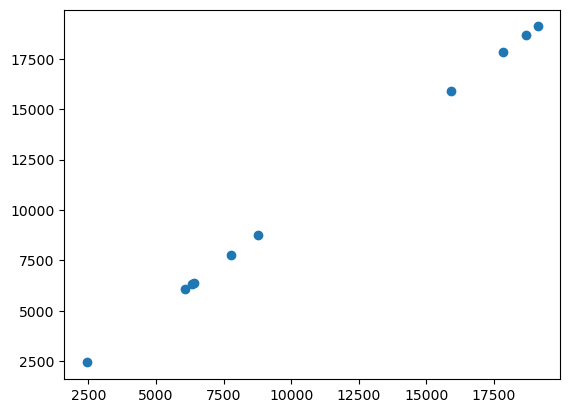

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(features_df['dadi_N0_rep_0'], features_df['dadi_N0_rep_1'])

In [1]:
import pickle
with open('/sietch_colab/akapoor/Infer_Demography/experiments/split_migration/inferences/sim_2/MomentsLD/best_fit.pkl', 'rb') as f:
    moments_ld_fit_params = pickle.load(f)

In [2]:
moments_ld_fit_params

{'best_params': {'N1': 7.826074609936462e+184,
  'N2': 1.5879731514952378e+149,
  't_split': 6.703269241266377e+149,
  'm12': 0.0,
  'm21': 0.0,
  'N0': 1.3060375438864104e+161},
 'best_lls': 29123.263872521875}

In [4]:
import pickle
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/features_df.pkl', 'rb') as f:
    features_df = pickle.load(f)

In [5]:
features_df.columns

Index(['dadi_N0_rep_0', 'dadi_N0_rep_1', 'dadi_N1_rep_0', 'dadi_N1_rep_1',
       'dadi_N2_rep_0', 'dadi_N2_rep_1', 'dadi_m_rep_0', 'dadi_m_rep_1',
       'dadi_t_split_rep_0', 'dadi_t_split_rep_1', 'momentsLD_N0',
       'momentsLD_N1', 'momentsLD_N2', 'momentsLD_m', 'momentsLD_t_split',
       'moments_N0_rep_0', 'moments_N0_rep_1', 'moments_N1_rep_0',
       'moments_N1_rep_1', 'moments_N2_rep_0', 'moments_N2_rep_1',
       'moments_m_rep_0', 'moments_m_rep_1', 'moments_t_split_rep_0',
       'moments_t_split_rep_1'],
      dtype='object')

In [6]:
features_df

,dadi_N0_rep_0,dadi_N0_rep_1,dadi_N1_rep_0,dadi_N1_rep_1,dadi_N2_rep_0,dadi_N2_rep_1,dadi_m_rep_0,dadi_m_rep_1,dadi_t_split_rep_0,dadi_t_split_rep_1,...,moments_N0_rep_0,moments_N0_rep_1,moments_N1_rep_0,moments_N1_rep_1,moments_N2_rep_0,moments_N2_rep_1,moments_m_rep_0,moments_m_rep_1,moments_t_split_rep_0,moments_t_split_rep_1
0,8033.078575,7815.411407,11211.385182,10919.743547,22609.774493,22564.403886,6.048212e-05,6.112477e-05,9508.478252,9087.856705,...,10621.389616,10621.530370,14686.189641,14686.279869,29735.152619,29734.900651,4.570169e-05,4.570118e-05,12298.949740,12299.460963
1,4422.800522,6848.916792,2708.333834,3843.097034,6308.096705,9581.106693,2.611004e-05,4.099177e-05,3232.419687,6847.351565,...,22469.245124,22462.703361,13044.646859,13047.428081,30000.000000,30000.000000,3.392833e-06,3.401664e-06,14133.987983,14140.190851
2,7941.285989,8943.615283,4011.885144,4541.790046,19779.400222,22486.394976,7.241926e-05,6.516745e-05,7353.055026,8459.362435,...,11800.359696,11800.568649,5996.314744,5996.549207,29182.229137,29180.914253,4.822452e-05,4.822298e-05,10564.322109,10563.986691
3,6807.570598,5836.140742,29844.686388,21830.882863,3907.722080,3543.456350,9.406522e-05,1.000000e-04,19080.771103,12319.124898,...,6234.887256,6235.196178,26499.920534,26502.530525,3647.560835,3646.959883,1.000000e-04,1.000000e-04,17331.798131,17334.324688
4,22230.806136,22956.804206,1745.702335,2590.225016,8930.802427,11692.360542,7.071525e-05,4.495878e-05,11379.967154,20000.000000,...,29735.705314,29736.084796,2424.803201,2424.884165,11775.620501,11775.613880,4.719528e-05,4.719420e-05,11900.682067,11901.060015
5,21403.990998,21088.025547,27090.148666,26395.503134,13945.106722,13646.616363,9.945971e-05,9.972394e-05,7135.932866,6952.900386,...,20053.983549,20054.353104,25484.952457,25482.728624,13219.221859,13219.128255,1.000000e-04,1.000000e-04,5933.543380,5933.421036
6,12990.729339,12793.035385,8251.395854,8055.562733,29374.900314,28773.089762,5.789466e-05,6.343850e-05,4524.040222,4648.872826,...,7003.228060,7003.110177,4495.978602,4496.121409,15919.743480,15919.443144,1.000000e-04,1.000000e-04,2363.881702,2363.949306
7,18356.297296,18074.589353,4436.578327,4357.140259,1425.411691,1500.372715,1.000000e-08,1.000000e-08,12198.516113,12301.773227,...,14353.323169,14362.736164,2831.076810,2833.592864,960.373877,962.215841,1.596763e-08,1.355638e-08,7582.518959,7593.276290
8,20976.011055,15696.355404,4025.751070,3288.608762,15963.940739,13251.812229,2.480975e-05,2.951279e-05,11619.088640,10416.655185,...,13589.240145,13583.813059,1744.366708,1746.121883,9014.560671,9017.326212,3.550977e-06,3.682774e-06,2636.447349,2641.849001
9,27648.263156,27277.350348,10290.288503,10276.512039,19971.099320,20328.271957,9.988789e-05,1.000000e-04,19838.720954,15832.621388,...,30000.000000,30000.000000,12019.977129,12019.973054,23501.126049,23501.183095,8.659470e-05,8.659551e-05,20000.000000,20000.000000


In [7]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/targets_df.pkl', 'rb') as f:
    targets_df = pickle.load(f)

In [9]:
targets_df

,N0,N1,N2,m,t_split
0,10798.197481,14301.029683,29188.230097,0.000034,12138.533968
1,21397.771624,13104.506916,29607.267213,0.000004,14438.577399
2,10342.699417,4650.996000,27241.276324,0.000035,17586.667652
3,6009.337815,27692.136918,3376.914899,0.000094,17827.199188
4,26621.002199,1912.478036,13749.571822,0.000022,4905.207737
5,19372.906697,24399.274505,13457.430736,0.000098,6497.551371
6,7163.310268,3927.647901,19812.347455,0.000057,1760.803060
7,17239.307359,2980.399298,1180.954980,0.000018,9683.775750
8,14571.693152,2376.438805,11046.626936,0.000033,9095.177666
9,29020.720101,11771.523574,24575.202931,0.000061,17126.764554


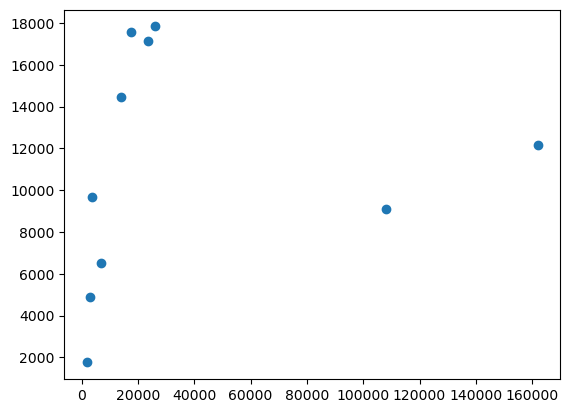

In [15]:
plt.figure()
plt.scatter(features_df['momentsLD_t_split'], targets_df['t_split'])

In [8]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/color_shades.pkl', 'rb') as f:
    color_shades = pickle.load(f)

In [9]:
color_shades

{'#ff0000': ['#ff0000', '#cc3d3d', '#995b5b'],
 '#cbff00': ['#cbff00', '#afcc3d', '#8c995b'],
 '#00ff66': ['#00ff66', '#3dcc76', '#5b9974'],
 '#0066ff': ['#0066ff', '#3d76cc', '#5b7499'],
 '#cc00ff': ['#cc00ff', '#af3dcc', '#8c5b99']}

In [10]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/main_colors.pkl', 'rb') as f:
    main_colors = pickle.load(f)

In [11]:
main_colors

['#ff0000', '#cbff00', '#00ff66', '#0066ff', '#cc00ff']

In [3]:
import pandas as pd
import pickle
import numpy as np
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/targets_train_norm_df.pkl', 'rb') as f:
    targets_train_norm_df = pickle.load(f)

In [5]:
# Get the number of NaN values in each column
nan_counts = targets_train_norm_df.isna().sum()

In [6]:
nan_counts

N0         0
N1         0
N2         0
m          0
t_split    0
dtype: int64

In [7]:
# Get the number of inf values in each column
inf_counts = np.isinf(targets_train_norm_df).sum()

In [8]:
inf_counts

N0         0
N1         0
N2         0
m          0
t_split    0
dtype: int64

In [15]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/features_val_norm_df.pkl', 'rb') as f:
    features_val_norm_df = pickle.load(f)

# # Get the number of NaN values in each column
# nan_counts_val = features_val_norm_df.isna().sum()
# print(nan_counts_val)

print(features_val_norm_df.max())

dadi_N0_rep_0             1.581141e+00
dadi_N1_rep_0             1.732051e+00
dadi_N2_rep_0             1.535621e+00
dadi_m_rep_0              1.712952e+00
dadi_t_split_rep_0        1.221437e+00
momentsLD_N0              9.913255e+01
momentsLD_N1              1.166096e+02
momentsLD_N2              4.109206e+08
momentsLD_m              1.535561e+147
momentsLD_t_split         3.240532e+02
moments_N0_rep_0          1.732051e+00
moments_N1_rep_0          1.732051e+00
moments_N2_rep_0          1.732051e+00
moments_m_rep_0           1.732051e+00
moments_t_split_rep_0     1.732051e+00
dtype: float64


In [11]:
# Get the number of inf values in each column
inf_counts_val = np.isinf(features_val_norm_df).sum()
print(inf_counts_val)

dadi_N0_rep_0            0
dadi_N1_rep_0            0
dadi_N2_rep_0            0
dadi_m_rep_0             0
dadi_t_split_rep_0       0
momentsLD_N0             0
momentsLD_N1             0
momentsLD_N2             0
momentsLD_m              0
momentsLD_t_split        0
moments_N0_rep_0         0
moments_N1_rep_0         0
moments_N2_rep_0         0
moments_m_rep_0          0
moments_t_split_rep_0    0
dtype: int64


In [12]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/targets_train_norm_df.pkl', 'rb') as f:
    targets_train_norm_df = pickle.load(f)

# Get the number of NaN values in each column
nan_counts_train = targets_train_norm_df.isna().sum()
print(nan_counts_train)

# Get the number of inf values in each column
inf_counts_train = np.isinf(targets_train_norm_df).sum()
print(inf_counts_train)

N0         0
N1         0
N2         0
m          0
t_split    0
dtype: int64
N0         0
N1         0
N2         0
m          0
t_split    0
dtype: int64


In [13]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/targets_val_norm_df.pkl', 'rb') as f:
    targets_val_norm_df = pickle.load(f)

# Get the number of NaN values in each column
nan_counts_val = targets_val_norm_df.isna().sum()
print(nan_counts_val)

# Get the number of inf values in each column
inf_counts_val = np.isinf(targets_val_norm_df).sum()
print(inf_counts_val)

N0         0
N1         0
N2         0
m          0
t_split    0
dtype: int64
N0         0
N1         0
N2         0
m          0
t_split    0
dtype: int64


In [1]:
import pickle
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/inferences/sim_0/MomentsLD/best_fit.pkl', 'rb') as f:
    best_fit = pickle.load(f)

In [2]:
best_fit

{'best_params': {'N_bottleneck': 1310.2982341787563,
  'N_recover': 13523.383769255375,
  't_bottleneck_start': 2818.562002084711,
  't_bottleneck_end': 1088.2819499168018,
  'N0': 9270.116327333282},
 'best_lls': 1.4733553932087977}

In [3]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/simulations/0/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [4]:
sampled_params

{'N0': 9270.116327333282,
 'N_bottleneck': 1310.2982341787563,
 'N_recover': 12944.412737352868,
 't_bottleneck_start': 2773.231210399062,
 't_bottleneck_end': 1076.309241352794}

Loaded 998 simulation ⇄ fit pairs
Figure saved to /home/akapoor/kernlab/Infer_Demography/experiments/bottleneck/truth_vs_mld.png


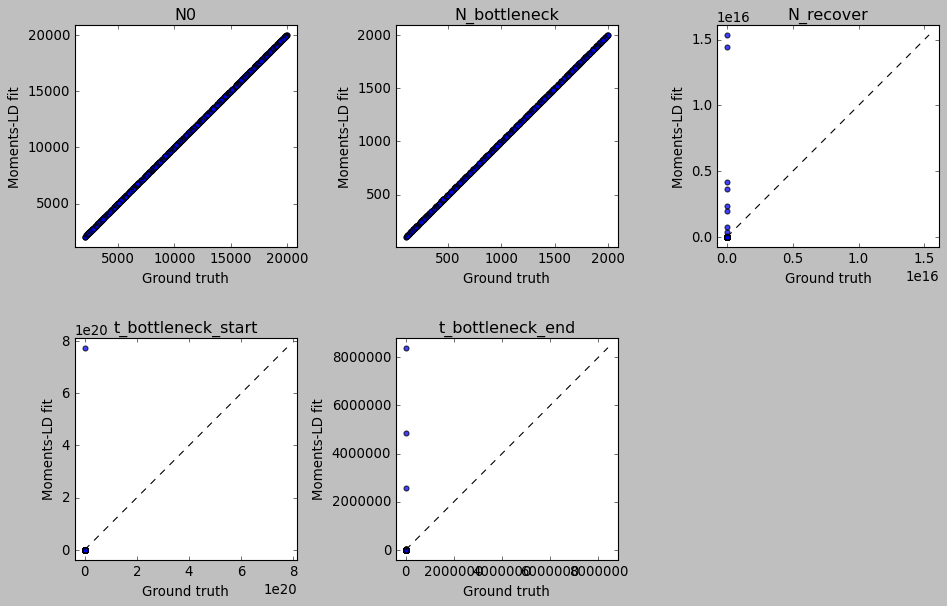

In [8]:
# %% [markdown] -------------------------------------------------------------
# # Compare ground‑truth parameters with Moments‑LD best fits
#
# *Loads every simulation in `experiments/<model>/` and shows
# scatter plots of inferred vs. true values.*
#
# **Parameters to edit in the first cell:**
#
# ```python
# MODEL = "bottleneck"        # folder name under experiments/
# OUT_PNG = "truth_vs_mld.png"  # location of the summary figure
# KEEP_FAILED = False          # include sims whose best‑fit has None?
# ```
# --------------------------------------------------------------------------

# %% -------------------------------------------------------- user settings
MODEL       = "bottleneck"            # <-- change if needed
OUT_PNG     = f"/home/akapoor/kernlab/Infer_Demography/experiments/{MODEL}/truth_vs_mld.png"
KEEP_FAILED = False                   # True = keep fits that contain None

# %% --------------------------------------------------- imports & helpers
import pickle, json, math, itertools, sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")      # matches your other plots

def load_pickle(p):
    with open(p, "rb") as fh:
        return pickle.load(fh)

SIM_DIR   = Path(f"/home/akapoor/kernlab/Infer_Demography/experiments/{MODEL}/simulations")
INFER_DIR = Path(f"/home/akapoor/kernlab/Infer_Demography/experiments/{MODEL}/inferences")

# %% ------------------------------------------------ gather all pairs
rows = []

for sid_path in sorted(SIM_DIR.iterdir()):
    sid = sid_path.name                      # e.g. "0", "127" …

    truth_pkl = sid_path / "sampled_params.pkl"
    fit_pkl   = INFER_DIR / f"sim_{sid}" / "MomentsLD" / "best_fit.pkl"
    if not (truth_pkl.exists() and fit_pkl.exists()):
        continue          # skip incomplete ones silently

    truth = load_pickle(truth_pkl)
    best  = load_pickle(fit_pkl)
    fit_params = best.get("best_params", {})

    if not KEEP_FAILED and any(v is None for v in fit_params.values()):
        continue          # drop failed optimisation

    row = {"sid": int(sid)}
    for k, v in truth.items():
        row[f"true_{k}"] = v
    for k, v in fit_params.items():
        row[f"fit_{k}"] = v
    rows.append(row)

df = pd.DataFrame(rows).set_index("sid").sort_index()
print(f"Loaded {len(df)} simulation ⇄ fit pairs")

df.head()

# %% ---------------------------------------------------- scatter grid
params = [c.replace("true_", "") for c in df.columns if c.startswith("true_")]
n_cols = 3
n_rows = math.ceil(len(params) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(4*n_cols, 4*n_rows),
                         squeeze=False)

for i, p in enumerate(params):
    r, c = divmod(i, n_cols)
    ax = axes[r][c]

    x = df[f"true_{p}"]
    y = df[f"fit_{p}"]

    ax.scatter(x, y, s=20, alpha=0.75)
    lo, hi = min(x.min(), y.min()), max(x.max(), y.max())
    pad = 0.05 * (hi - lo)
    ax.plot([lo, hi], [lo, hi], "k--", lw=1)
    ax.set_xlim(lo - pad, hi + pad)
    ax.set_ylim(lo - pad, hi + pad)
    ax.set_title(p)
    ax.set_xlabel("Ground truth")
    ax.set_ylabel("Moments‑LD fit")
    ax.set_aspect("equal", adjustable="box")

# hide any empty axes
for j in range(len(params), n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes[r][c].axis("off")

fig.tight_layout()
fig.savefig(OUT_PNG, dpi=300)
print("Figure saved to", OUT_PNG)

# %% [markdown] -------------------------------------------------------------
# ## What next?
#
# * Scroll through the scatter plots to spot systematic bias or variance.
# * Hover a point in Jupyter Lab (if enabled) to read its simulation ID
#   (sid shown on the index of `df`).
# * To investigate an outlier, pick its `sid` and open the corresponding
#   `sampled_params.pkl` / `best_fit.pkl`.
# --------------------------------------------------------------------------


In [11]:
with open('/home/akapoor/kernlab/Infer_Demography/debugging_experiments/split_isolation/inferences/sim_0/MomentsLD/best_fit.pkl', 'rb') as f:
    best_fit = pickle.load(f)

In [12]:
best_fit

{'best_params': {'N1': 11483.57809495059,
  'N2': 13313.943402563858,
  't_split': 5839.882774577925,
  'm': 1.3010609807266205e-08,
  'N0': 1922.5835827666117},
 'best_lls': 10667.961360771254}

In [13]:
with open('/home/akapoor/kernlab/Infer_Demography/debugging_experiments/split_isolation/simulations/0/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [14]:
sampled_params

{'N0': 3101.280015497641,
 'N1': 13003.687026818467,
 'N2': 14877.956196170097,
 'm': 2.871619867454109e-05,
 't_split': 11703.207051289324}

In [4]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/inferences/sim_0/MomentsLD/LD_stats/LD_stats_window_0.pkl', 'rb') as f:
    LD_stats = pickle.load(f)

In [6]:
LD_stats['bins']

[(0.0, 1e-06),
 (1e-06, 3.2e-06),
 (3.2e-06, 1e-05),
 (1e-05, 3.2e-05),
 (3.2e-05, 0.0001),
 (0.0001, 0.00032),
 (0.00032, 0.001)]

In [8]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/simulations/0/sampled_params.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [9]:
sampled_params

{'N0': 19887.621224708317,
 'N1': 5152.277156036241,
 'N2': 15209.531740910574,
 'm': 9.853226216893704e-05,
 't_split': 694.6451840248305}

In [10]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/runs/run_0_0/inferences/dadi/fit_params.pkl', 'rb') as f:
    dadi_fit_params = pickle.load(f)

In [11]:
dadi_fit_params

{'best_params': {'N0': 22543.79649657831,
  'N1': 6007.534144821499,
  'N2': 15947.09702894221,
  'm': 7.392861156174717e-05,
  't_split': 686.1228317428687},
 'best_lls': -1505.4740848816232}

In [12]:
# %% -------------------------------------------------------- user settings
MODEL       = "split_isolation"  # <-- change if needed
OUT_PNG     = f"/home/akapoor/kernlab/Infer_Demography/experiments/{MODEL}/truth_vs_dadi.png"
KEEP_FAILED = False

# %% --------------------------------------------------- imports & helpers
import pickle, json, math
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")

def load_pickle(p):
    with open(p, "rb") as fh:
        return pickle.load(fh)

SIM_DIR   = Path(f"/home/akapoor/kernlab/Infer_Demography/experiments/{MODEL}/simulations")
INFER_DIR = Path(f"/home/akapoor/kernlab/Infer_Demography/experiments/{MODEL}/inferences")

# %% ------------------------------------------------ gather all pairs
rows = []

for sid_path in sorted(SIM_DIR.iterdir()):
    sid = sid_path.name  # e.g., "0", "127"
    
    truth_pkl = sid_path / "sampled_params.pkl"
    fit_pkl   = INFER_DIR / f"sim_{sid}" / "dadi" / "fit_params.pkl"
    if not (truth_pkl.exists() and fit_pkl.exists()):
        continue

    truth = load_pickle(truth_pkl)
    best  = load_pickle(fit_pkl)
    fit_params = best.get("best_params", {})

    if not KEEP_FAILED and any(v is None for v in fit_params.values()):
        continue

    row = {"sid": int(sid)}
    for k, v in truth.items():
        row[f"true_{k}"] = v
    for k, v in fit_params.items():
        row[f"fit_{k}"] = v
    rows.append(row)

df = pd.DataFrame(rows).set_index("sid").sort_index()
print(f"Loaded {len(df)} simulation ⇄ dadi-fit pairs")

# %% ---------------------------------------------------- scatter grid
params = [c.replace("true_", "") for c in df.columns if c.startswith("true_")]
n_cols = 3
n_rows = math.ceil(len(params) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(4*n_cols, 4*n_rows),
                         squeeze=False)

for i, p in enumerate(params):
    r, c = divmod(i, n_cols)
    ax = axes[r][c]

    x = df[f"true_{p}"]
    y = df[f"fit_{p}"]

    ax.scatter(x, y, s=20, alpha=0.75)
    lo, hi = min(x.min(), y.min()), max(x.max(), y.max())
    pad = 0.05 * (hi - lo)
    ax.plot([lo, hi], [lo, hi], "k--", lw=1)
    ax.set_xlim(lo - pad, hi + pad)
    ax.set_ylim(lo - pad, hi + pad)
    ax.set_title(p)
    ax.set_xlabel("Ground truth")
    ax.set_ylabel("Dadi fit")
    ax.set_aspect("equal", adjustable="box")

# hide any empty axes
for j in range(len(params), n_rows * n_cols):
    r, c = divmod(j, n_cols)
    axes[r][c].axis("off")

fig.tight_layout()
fig.savefig(OUT_PNG, dpi=300)
print("Figure saved to", OUT_PNG)


KeyError: "None of ['sid'] are in the columns"

In [15]:
# --------------------------------------------------------------------------
# truth_vs_dadi.py  —  compare ground-truth with dadi best fits across runs
# --------------------------------------------------------------------------
from __future__ import annotations
from pathlib import Path
import pickle
import re
import math
from typing import Iterable, Optional, Dict, Any, List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")  # to match your other plots

def _load_pickle(p: Path):
    with p.open("rb") as fh:
        return pickle.load(fh)

def _pick_run_fit_for_sid(runs_dir: Path, sid: int) -> Optional[Path]:
    """
    Return the path to the dadi fit file for a given sid.
    Selects the most recently modified fit if multiple run_{sid}_* exist.
    """
    # pattern: experiments/<MODEL>/runs/run_<sid>_<opt>/inferences/dadi/fit_params.pkl
    candidates = list((runs_dir).glob(f"run_{sid}_*/inferences/dadi/fit_params.pkl"))
    if not candidates:
        return None
    # choose the most recently modified fit file
    candidates.sort(key=lambda p: p.stat().st_mtime, reverse=True)
    return candidates[0]

def plot_truth_vs_dadi(
    model: str = "split_isolation",
    exp_root: str = "/home/akapoor/kernlab/Infer_Demography/experiments",
    out_png: Optional[str] = None,
    keep_failed: bool = False,
    log_params: Iterable[str] = ("m",),   # log-scale certain params (e.g., migration)
    point_alpha: float = 0.75,
    point_size: float = 20.0,
) -> pd.DataFrame:
    """
    Build scatter plots of true vs dadi-fitted parameters for all runs.

    Returns the DataFrame used to generate the plots.
    """
    EXP_ROOT = Path(exp_root)
    SIM_DIR  = EXP_ROOT / model / "simulations"
    RUNS_DIR = EXP_ROOT / model / "runs"

    if out_png is None:
        out_png = str(EXP_ROOT / model / "truth_vs_dadi.png")

    rows: List[Dict[str, Any]] = []

    if not SIM_DIR.exists():
        raise FileNotFoundError(f"Simulations dir not found: {SIM_DIR}")
    if not RUNS_DIR.exists():
        raise FileNotFoundError(f"Runs dir not found: {RUNS_DIR}")

    # Iterate all simulation IDs under simulations/
    for sid_path in sorted(SIM_DIR.iterdir(), key=lambda p: int(p.name) if p.name.isdigit() else 10**9):
        if not sid_path.is_dir() or not sid_path.name.isdigit():
            continue
        sid = int(sid_path.name)

        truth_pkl = sid_path / "sampled_params.pkl"
        fit_pkl   = _pick_run_fit_for_sid(RUNS_DIR, sid)
        if fit_pkl is None or not truth_pkl.exists():
            continue

        truth = _load_pickle(truth_pkl)  # dict of true params
        fit   = _load_pickle(fit_pkl)    # {'best_params': {...}, 'best_lls': ...}
        fit_params: Dict[str, Any] = dict(fit.get("best_params", {}))

        if not keep_failed and (not fit_params or any(v is None for v in fit_params.values())):
            # Skip failed fits unless requested
            continue

        row = {"sid": sid}
        # only include params present in truth to stay consistent
        for k, v in truth.items():
            row[f"true_{k}"] = v
        for k, v in fit_params.items():
            row[f"fit_{k}"] = v
        rows.append(row)

    df = pd.DataFrame(rows).set_index("sid").sort_index()
    print(f"Loaded {len(df)} simulation ⇄ dadi-fit pairs")

    if df.empty:
        # Create an empty figure to avoid Snakemake missing output errors,
        # but notify the user.
        fig = plt.figure(figsize=(6, 4))
        fig.text(0.5, 0.5, "No completed dadi fits found", ha="center", va="center")
        fig.tight_layout()
        fig.savefig(out_png, dpi=300)
        plt.close(fig)
        return df

    # Figure: one panel per parameter common to truth/fit
    params = sorted({c.replace("true_", "") for c in df.columns if c.startswith("true_")}
                    & {c.replace("fit_", "")  for c in df.columns if c.startswith("fit_")})
    n_cols = 3
    n_rows = math.ceil(len(params) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), squeeze=False)

    for i, p in enumerate(params):
        r, c = divmod(i, n_cols)
        ax = axes[r][c]

        x = pd.to_numeric(df.get(f"true_{p}"), errors="coerce")
        y = pd.to_numeric(df.get(f"fit_{p}"),  errors="coerce")

        # Remove NaNs / None
        valid = x.notna() & y.notna()
        x = x[valid]
        y = y[valid]

        # Optional log scaling for selected parameters
        use_log = p in set(log_params or [])
        if use_log:
            # filter out non-positive values
            pos = (x > 0) & (y > 0)
            x = x[pos]; y = y[pos]
            ax.set_xscale("log")
            ax.set_yscale("log")

        if len(x) == 0:
            ax.text(0.5, 0.5, f"No data for {p}", ha="center", va="center")
            ax.axis("off")
            continue

        ax.scatter(x, y, s=point_size, alpha=point_alpha)

        # Identity line (works in both lin and log scales)
        lo = min(x.min(), y.min())
        hi = max(x.max(), y.max())
        if not use_log:
            pad = 0.05 * (hi - lo)
            lo_p, hi_p = lo - pad, hi + pad
        else:
            # add a small multiplicative padding for log axes
            lo_p, hi_p = lo / 1.2, hi * 1.2

        ax.plot([lo_p, hi_p], [lo_p, hi_p], "k--", lw=1)
        ax.set_xlim(lo_p, hi_p)
        ax.set_ylim(lo_p, hi_p)
        ax.set_title(p)
        ax.set_xlabel("Ground truth")
        ax.set_ylabel("dadi fit")
        ax.set_aspect("equal", adjustable="box")

        # Small quality metric: R^2 on current panel (in linear space only)
        try:
            if len(x) >= 2 and not use_log:
                ss_res = float(((y - x) ** 2).sum())
                ss_tot = float(((x - x.mean()) ** 2).sum()) + 1e-12
                r2 = 1.0 - ss_res / ss_tot
                ax.text(0.05, 0.95, f"$R^2$={r2:.3f}", transform=ax.transAxes,
                        va="top", ha="left", fontsize=9)
        except Exception:
            pass

    # Hide any empty axes
    for j in range(len(params), n_rows*n_cols):
        r, c = divmod(j, n_cols)
        axes[r][c].axis("off")

    fig.tight_layout()
    fig.savefig(out_png, dpi=300)
    plt.close(fig)
    print("Figure saved to", out_png)

    return df


In [16]:
# In a notebook or a small script:
df = plot_truth_vs_dadi(
    model="split_isolation",
    exp_root="/home/akapoor/kernlab/Infer_Demography/experiments",
    out_png="/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/truth_vs_dadi.png",
    keep_failed=False,            # set True if you want to include runs with None
    log_params=("m",),            # log scale for migration rate
)
df.head()


Loaded 10 simulation ⇄ dadi-fit pairs
Figure saved to /home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/truth_vs_dadi.png


,true_N0,true_N1,true_N2,true_m,true_t_split,fit_N0,fit_N1,fit_N2,fit_m,fit_t_split
sid,,,,,,,,,,
0,19887.621225,5152.277156,15209.531741,0.000099,694.645184,18137.102934,15804.649137,17426.140463,0.000071,1246.359325
1,16014.305295,29775.193900,20488.788802,0.000063,2969.423355,15417.650429,25717.536312,19837.875089,0.000071,2885.585321
2,22619.955418,16779.016469,24691.177218,0.000087,9730.151811,18719.700269,14547.334673,20003.867762,0.000100,7004.147937
3,8451.920176,10536.065329,14966.513642,0.000097,16103.150546,10847.251733,13603.418129,19804.902864,0.000076,20000.000000
4,11336.388925,20276.783933,13124.258629,0.000032,11580.673908,11138.094570,20048.773116,12290.411155,0.000033,12242.665874


In [2]:
from sklearn.metrics import mean_squared_error as sk_mse

In [3]:
with open('/home/akapoor/kernlab/Infer_Demography/experiments/split_isolation/modeling/datasets/normalized_train_features.pkl', 'rb') as f:
    train_features = pickle.load(f)

In [4]:
train_features

,dadi_N0_rep_0,dadi_N0_rep_1,dadi_N0_rep_2,dadi_N0_rep_3,dadi_N0_rep_4,dadi_N1_rep_0,dadi_N1_rep_1,dadi_N1_rep_2,dadi_N1_rep_3,dadi_N1_rep_4,...,moments_m_rep_0,moments_m_rep_1,moments_m_rep_2,moments_m_rep_3,moments_m_rep_4,moments_t_split_rep_0,moments_t_split_rep_1,moments_t_split_rep_2,moments_t_split_rep_3,moments_t_split_rep_4
104,-1.310492,-1.411640,-1.257724,-1.299196,-1.356575,-1.052140,-1.193878,-0.963868,-1.014901,-1.123687,...,-1.209725,-1.209723,-1.209723,-1.209718,-1.209725,0.536325,0.536328,0.536329,0.536340,0.536325
54,1.726659,1.350676,1.483361,1.732051,1.148926,-0.652505,-0.773668,-0.776521,-0.705717,-0.818394,...,-1.594828,-1.588505,-1.614537,-1.619741,-1.704231,-1.670237,-1.669607,-1.670642,-1.670610,-1.671290
605,-0.999232,-0.976083,-0.910815,-0.979719,-0.948368,-0.272229,-0.232279,-0.088745,-0.248258,-0.172245,...,-0.802465,-0.802337,-0.802337,-0.802336,-0.802338,-0.651924,-0.651889,-0.651889,-0.651887,-0.651889
988,-1.520894,-1.472766,-1.520794,-1.480163,-1.474954,1.068871,1.683115,1.113054,1.659388,1.611424,...,0.034501,0.034501,0.034501,0.034512,0.034501,-1.063931,-1.063931,-1.063931,-1.063931,-1.063931
293,-1.136222,-1.190423,-1.154388,-1.112306,-1.109646,-0.310334,-0.436191,-0.349068,-0.261794,-0.252526,...,-0.817405,-0.817405,-0.817405,-0.817405,-0.817405,-0.069464,-0.069464,-0.069464,-0.069464,-0.069464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,-1.477947,-1.453051,-1.508801,-1.488314,-1.481160,0.465800,0.701004,0.218046,0.364375,0.427587,...,0.174138,0.173871,0.173875,0.173875,0.173875,0.955921,0.955781,0.955784,0.955784,0.955785
817,0.464488,0.716773,1.510205,0.639803,-0.361373,-1.607260,-1.554517,-1.467627,-1.585685,-1.633285,...,-1.498069,-1.498071,-1.498069,-1.498224,-1.497983,-1.170144,-1.170141,-1.170137,-1.170139,-1.170090
5,-0.143668,0.110411,0.152601,0.104368,0.130686,-0.370565,-0.145733,-0.098496,-0.149603,-0.137051,...,-0.964967,-0.965103,-0.965080,-0.965119,-0.965037,1.597529,1.597324,1.597675,1.597570,1.597241
100,0.542921,1.556191,0.704782,1.036137,1.688253,-0.765856,-0.304267,-0.683180,-0.501537,-0.327227,...,-1.089163,-1.089300,-1.089009,-1.089043,-1.089009,-0.322290,-0.322184,-0.322327,-0.322341,-0.322325
